
* Let's start with the notebook, following along to derive more material for learning.
Overall, it seems the objective of this notebook is to build a single-layer perceptrion based network in order to preform binary classification, kinda like those models within machine learning. To begin, I have to create a class for the network (or graph) and define some of it's attributes.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SingleLayerPerceptron:
    def __init__(self, my_weights, my_bias, learningRate=0.05):
        self.weights = my_weights
        self.bias = my_bias
        self.learningRate = learningRate
        
    def activation(self, net):
        answer = 1 if net > 0 else 0
        return answer
    
    def neuron(self, inputs):
        neuronArchitecture = np.dot(self.weights, inputs) + self.bias
        return neuronArchitecture
    
    def neuron_propagate(self, inputs):
        processing = self.neuron(inputs)
        return self.activation(processing) 
    
    def training(self, inputs, output):
        output_prev = self.neuron_propagate(inputs)
        self.weights = [W + X * self.learningRate * (output - output_prev)
                       for (W, X) in zip(self.weights, inputs)]
        self.bias += self.learningRate * (output - output_prev)
        error_calculation = np.abs(output_prev - output)
        return error_calculation



- What is a class in python again, and how it is used here?
  A class within python is the product of object-oriented programming: viz the programer themselves using self-defined types to organize data and code: so this class is basically a collection of functions that creates the class object SignleLayerPerceptron or rather __main__.SignleLayerPerceptron. Within this class is the code, being functions, which take in the programmer-defined objects (here the class) as parameters to the defined function. 


- "answer = 1 if net > 0 else 0"?
- How is the architecture defined?
- How does the training function depend on the periouvly defined functions within it's class? What about the other functions? In isolation? 

** After creating the graph and it's functions processes, I need to create a dataset.
Instead of using one off the shelf, I'll just create one using numpy's random methods.

In [2]:
import numpy as np
import pandas as pd

data = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))
print(data.head())

         x1        x2
0  0.897505  0.180250
1  0.360574  0.581698
2  0.392481  0.496499
3  0.062647  0.372586
4  0.119121  0.525216


and now defining the functions show_dataset for, well showing it; creating the function for testing the inputs' sum being greater then one; and then applying such an answer from testing being on axis-1 to the 'y' column of the dataset.

In [3]:

def show_dataset(data, ax):
    data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
    data[data.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
    plt.grid()
    plt.title('My Dataset')
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

def testing(inputs):
    answer=int(np.sum(inputs) > 1 )
    return answer

data['y'] = data.apply(testing, axis=1)


return here to go futher into the second function definitino and the y-variable assignment. 

*** From here, I'll visulize the dataset.

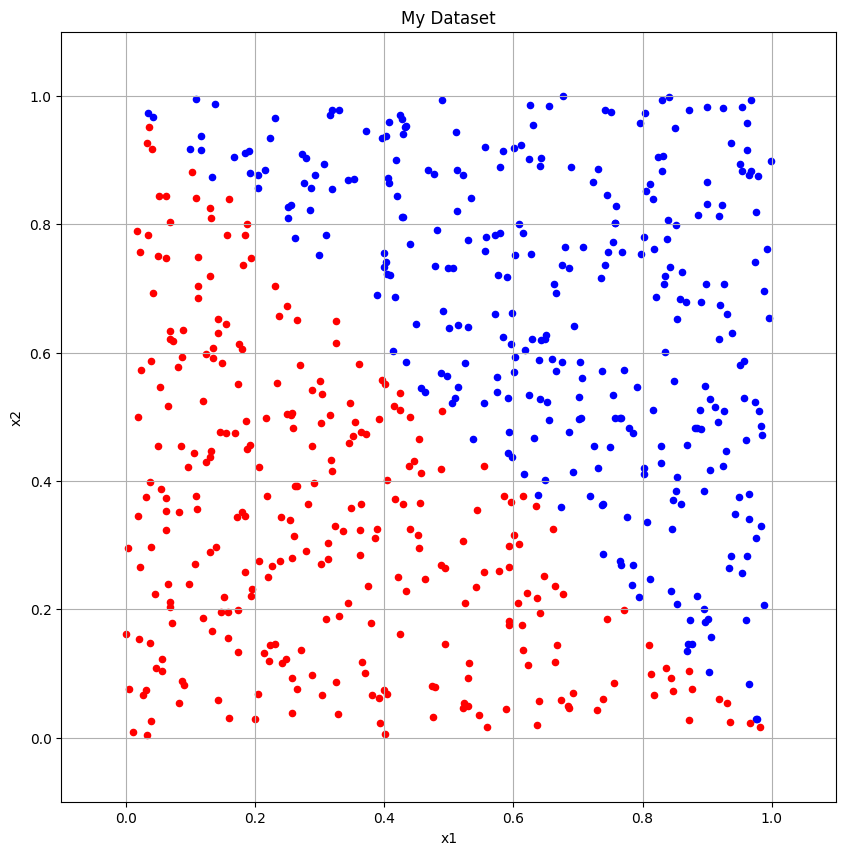

In [4]:

fig = plt.figure(figsize=(10,10))
show_dataset(data, fig.gca())


taking a look at it, it can be seen the division of the points into either red or blue dending on it's value, being either one or zero.  

** Setting weights, baiases, and learningRate.

- Seems like learning-rate is connected to numerical compuations done (chapter five) located in the subject of gradient-based optimization.
- I can't give a clear answer here, but baiases seem to be in the area of hyperparameters generally, and one of those involds using methods for parameter values which is something that is trying to be learned generally for inference/genalization.  
- Weight are basically coefficents that multiple the features to influence the value of prediciton $\hat{y}$

From here, I'll set the listed hyperparameters,

In [8]:
initialWeights = [0.1, 0.1]

initialBias = 0.01
learningRate = 0.1
SLperceptron = SingleLayerPerceptron(initialWeights,
                                     initialBias,
                                     learningRate) 


Later on, the initilization of the single layer preception's parameter is done for such hyperparameters.

*** So what are the three listed & used hyperparamteres used here?
**** Weights
My orignal notes were pretty spot on about what weights are: they're coefficients of the features (numerically coded) that will influence the prediciton ($\hat{y}): that's in a more linear case anyways. Genereally, weights are paremters of the system that can be changed for a effect of it.   
**** Baiases
I think the best way to figure what Bias really are is by just stating,

$\bias(\hat{\theta_{M}})=\mathbb{E}(\hat{\theta_{M}}))-\theta$

which is to say bias is the difference between the estimated value of a paremter under a expected value function subtracted from the true value for that paremeter; if it were to be zero, then there wouldn't be any bias connected to the estimated paremeter. What is the expected value function? Such a function seeks to find the mean value of the estimator (a formula or rule that estimates the true value of the vector or set of vectors for a or some paremters) from every possible sample size of the 'm' elments within the set of datapoints.

So how is the bias connected to this difference? Or in other words, what is there a bias of? If I recall back, the paremteres are values which control the systems behaviour, but we don't always know what these parameters are, so we'll estimate them as we did, but getting such estimates (being either value, fomrula, etc) involves finding possible over or under estimation of the possible parameter values, which is done here.   

**** Learning Rate.
In Goodfellow et all's book, the learning rate is described as "a positive sclaer determining the size of a step", where overall this subject matter is over numerical compuation involing it's use for Gradient-Based Optimization: what a mouthfull, and what is this 'step' and why is it important? First, it's the case that it appears in notion as $\epsilon$, which is to say it's being used in the context of some infintisimal small change, perhpas by beinga multiple of some greater product; in this case, that's what's happneing when it's being used for minimizing the objective function by using gradient descent.  

** The network, after defining some futher functions, can be ran on the data.
The functions that I'll be creating will serve to,
- Showing the mulitple instances of the graph representing the data.
- The function which will take in the network and inputs ( the data ).
- Defining the function which will establish a limit or threshold, takingg in the neurons and inputs to do so.
- A function which when taking in the perceptron network and ax(?) creates the graph for the thresholds shown for each training cycle.

/tmp/ipykernel_18707/2196827037.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line[2])
/tmp/ipykernel_18707/2196827037.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line[2])
/tmp/ipykernel_18707/2196827037.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line[2])
/tmp/ipykernel_18707/2196827037.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

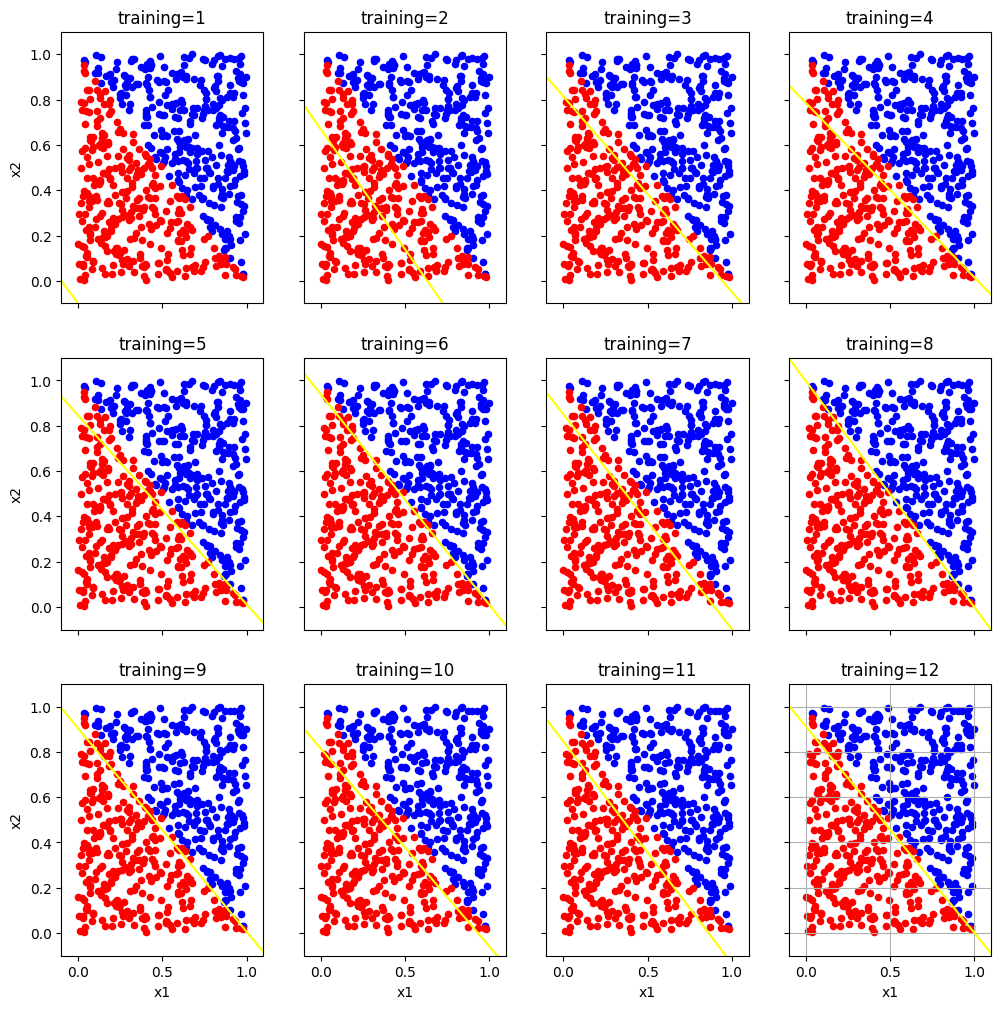

In [10]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()
        
    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)
    
def trainingData(SinglePerceptron, inputs):
    count = 0 
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2], 
                                                  line[2])
        
    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    
    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]
    
    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)
 #+end_src



Looking through its output, there can be seen a linear progression of the correct placement of the threshold for properly differentiating the binary classification. This implies the network could have learned an optimal function for further generalization of similar data for binary separation.